# **R-Squared**

R-squared란? 모델이 데이터에 얼마나 적합한 지 수치 적으로 결정하는 방법입니다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random
%matplotlib inline

## **MSE (Mean Squared Error)**

$$ \frac{(실제값-예측값)^2}{데이터 수} $$

In [2]:
x=[[1],[2],[3],[4],[5]]
y=[[1],[5],[6],[7],[11]]
y=np.array(y)
x=np.array(x)
mean=(1+5+6+7+11)/5 #데이터의 평균값
print(y)

[[ 1]
 [ 5]
 [ 6]
 [ 7]
 [11]]


Text(0, 0.5, 'Y')

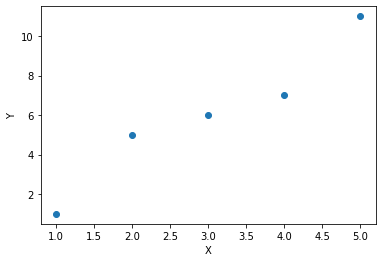

In [3]:
plt.plot(x, y, marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

In [4]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

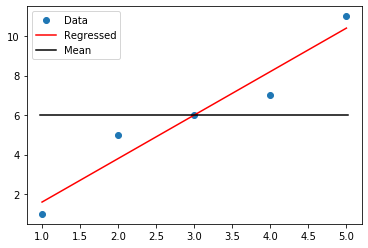

In [5]:
plt.plot(x, y, marker='o',linestyle='')
plt.plot(x,lr.predict(x),color = 'red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color = 'black')
plt.legend(['Data', 'Regressed', 'Mean'])

In [6]:
mean_squared_error(y, lr.predict(x))

0.7200000000000001

In [7]:
print(lr.predict(x))

[[ 1.6]
 [ 3.8]
 [ 6. ]
 [ 8.2]
 [10.4]]


In [8]:
def myMSE(X, Y, line): 
    err=0
    #for i in range(len(X)):        #예측값 MSE 구하기
    #        err +=(Y[i][0]-line[i][0])**2 
    
    if (str(type(line)) == "<class 'float'>"): #평균 MSE 구하기
        for i in range(len(X)):
            err += (Y[i][0]-line)**2
        
    else:
        for i in range(len(X)):        #예측값 MSE 구하기
             err +=(Y[i][0]-line[i][0])**2 
    
    
    MSE = err/len(X) 
    return MSE
                                       

In [9]:
print("MSE : ", myMSE(x,y,lr.predict(x)))


MSE :  0.7200000000000001


## **R-squared**

$$ R^2 = 1 - \frac{𝑀𝑆𝐸\,𝑜𝑓 \,𝑟𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛\, 𝑙𝑖𝑛𝑒}{𝑀𝑆𝐸\, 𝑜𝑓 \,𝑡ℎ𝑒\, 𝑎𝑣𝑒𝑟𝑎𝑔𝑒 \,𝑜𝑓 \,𝑡ℎ𝑒 \,𝑑𝑎𝑡𝑎} $$

In [10]:
lr.score(x, y)

0.9307692307692308

In [11]:
def myRsq(X,Y,model):
    
    #평균구하기
    hap = 0
    for i in range(len(X)):
        hap += Y[i][0]
    mean = float(hap/len(X))
    print("평균 : ", mean)
    
    #모델fit하기
    model.fit(X,Y)
    
    #MSE와 R-squared구하기
    reg_mse=myMSE(X,Y,model.predict(X))
    avg_mse=myMSE(X,Y,mean)
    r=1-(reg_mse/avg_mse)
    
    #출력
    #print("MSE of regression line : ",reg_mse)
    #print("MSE of average line : ", avg_mse)
    print("R-squared : ", r)  

In [12]:
myRsq(x,y,LinearRegression())

평균 :  6.0
R-squared :  0.9307692307692308


## 100개 데이터로 해보기

## 데이터가 선형모델에 적합한 경우

### 1. 데이터 만들기

In [13]:
data=100 #데이터 개수 정하기

In [14]:
#x_train 데이터 만들기
x_train=[]
for i in range(1,data+1):
    x_train.append([i])
    
x_train=np.array(x_train)
x_train.shape

(100, 1)

In [15]:
#y_train 데이터 만들기
y_train1=[]
for i in range(1,data+1): #y_train에 노이즈를 만들어서 넣기
    y_train1.append([i+random.uniform(-20, 20)])#난수발생시켜서 노이즈 만들기

y_train1=np.array(y_train1)
y_train1.shape

(100, 1)

Text(0, 0.5, 'Y')

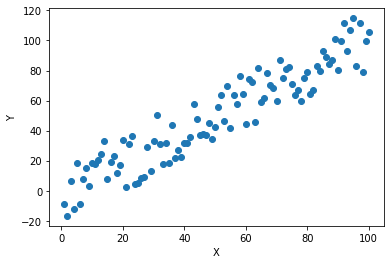

In [16]:
plt.plot(x_train, y_train1, marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

### 2.모델에 넣기

In [17]:
lr.fit(x_train,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#평균값 구하기
mean=0
for i in y_train1:
    for j in i:
        mean+=j
mean= mean/data
print(mean)

49.39338303529861


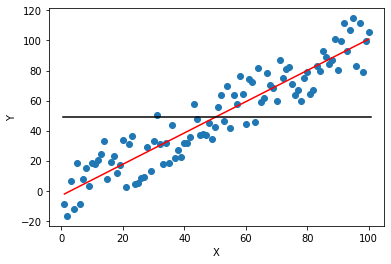

In [19]:
#예측한 값과 평균 그려보기
plt.plot(x_train, y_train1,marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_train,lr.predict(x_train),color = 'red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color = 'black')

함수와 내가 만든 함수 비교하기

In [20]:
lr.score(x_train,y_train1)

0.8759950307246039

In [21]:
myRsq(x_train, y_train1, LinearRegression())

평균 :  49.39338303529861
R-squared :  0.8759950307246039


## 데이터가 선형모델에 부적합한 경우

In [22]:
y_train2=[]
for i in range(1,data+1): #y_train에 노이즈를 만들어서 넣기
    y_train2.append([i+random.uniform(-400, 400)])#난수발생시켜서 노이즈 만들기

y_train2=np.array(y_train2)
y_train2.shape

(100, 1)

Text(0, 0.5, 'Y')

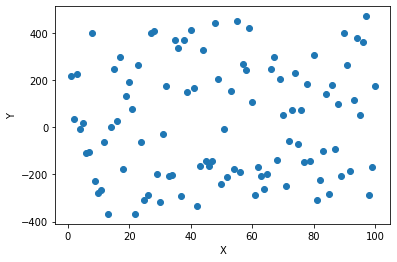

In [23]:
plt.plot(x_train, y_train2, marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

In [24]:
mean=0
for i in y_train2:
    for j in i:
        mean+=j
mean= mean/data
print(mean)

24.304147677630045


In [25]:
lr.fit(x_train,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

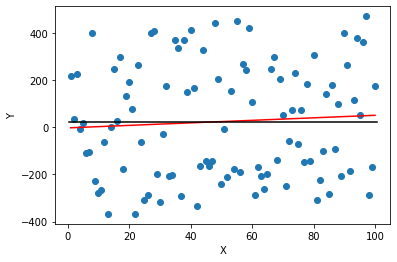

In [26]:
plt.plot(x_train, y_train2,marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_train,lr.predict(x_train),color = 'red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color = 'black')

In [27]:
lr.score(x_train,y_train2)

0.0041130043131939464

In [28]:
myRsq(x_train, y_train2, LinearRegression())

평균 :  24.304147677630045
R-squared :  0.0041130043131940575


Provided by Minseo Hwangbo